# Building a neuron!

In this section, we will implement one of the simplest mathematical model of a neuron: the **leaky integrate-and-fire (LIF) model**. The basic idea of LIF neuron was proposed in 1907 by Louis Édouard Lapicque, long before we understood the electrophysiology of a neuron (see a translation of [Lapicque’s paper](https://link.springer.com/article/10.1007/s00422-007-0190-0)). More details of the model can be found in the book [Theoretical neuroscience by Peter Dayan and Laurence F. Abbott](https://www.gatsby.ucl.ac.uk/~dayan/book/).

Let us first watch a video that gives an introduction to the leaky-integrate-fire (LIF) model, before we formalize and code one up:

<iframe width="560" height="315" src="https://www.youtube.com/embed/rSExvwCVRYg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

## LIF Neuron Model Description

The subthreshold membrane potential dynamics of a Leaky Integrate-and-Fire (LIF) neuron is described by the following differential equation:

\begin{align}
C_m \frac{dV}{dt} = -g_L(V-E_L) + I \quad \text{(1)}\\
\end{align}

where:
- $C_m$ is the membrane capacitance,
- $V$ is the membrane potential,
- $g_L$ is the leak conductance ($g_L = \frac{1}{R}$, with $R$ being the leak resistance),
- $E_L$ is the resting potential, and
- $I$ is the external input current.

Dividing both sides of Equation (1) by $g_L$ gives:


\begin{align}
\tau_m \frac{dV}{dt} = -(V - E_L) + \frac{I}{g_L} \quad \text{(2)}\\
\end{align}

where $\tau_m$ is the membrane time constant and is defined as $\tau_m = \frac{C_m}{g_L}$. Note that dividing capacitance by conductance gives units of time!

### Simulation of LIF Neuron Dynamics

We will use Equation (2) to simulate the dynamics of the LIF neuron.

If the external input $I$ is strong enough to make the membrane potential $V$ reach a certain threshold value $V_{\text{th}}$, the neuron will generate a spike. In that case, the membrane potential $V$ is reset to a value $V_{\text{reset}}$ (where $V_{\text{reset}} < V_{\text{th}}$), and the voltage is clamped to $V_{\text{reset}}$ for a certain refractory period $\tau_{\text{ref}}$ ms, mimicking the refractoriness of the neuron during an action potential:

\begin{align}
\text{if}\quad V(t_{\text{sp}}) \geq V_{\text{th}}: \quad V(t) = V_{\text{reset}} \quad \text{for } t \in (t_{\text{sp}}, t_{\text{sp}} + \tau_{\text{ref}})\\
\end{align}

where $t_{\text{sp}}$ is the spike time when the membrane potential $V(t)$ just exceeded $V_{\text{th}}$.

**Note:** In the video, the symbol $\theta$ corresponds to the threshold voltage $V_{\text{th}}$, and the symbol $\Delta$ corresponds to the refractory time $\tau_{\text{ref}}$.

The LIF model captures several important aspects of a neuron, including:
- Spatial and temporal integration of synaptic inputs,
- Spike generation upon reaching the threshold,
- Refractoriness during the action potential,
- Leaky membrane behavior.

It is essential to keep in mind that the LIF model assumes that spatial and temporal integration of inputs is linear and that membrane potential dynamics close to the spike threshold are much slower in LIF neurons compared to real neurons.


### Coding up a LIF neuron

We now look at the Python code to calculate our equation for the LIF neuron and simulate the LIF neuron dynamics. We will use the "Euler method" to numerically integrate this equation:

\begin{equation}
\tau_m\frac{dV}{dt} = -(V-E_L) + \frac{I}{g_L}\,
\end{equation}

where $V$ is the membrane potential, $g_L$ is the leak conductance, $E_L$ is the resting potential, $I$ is the external input current, and $\tau_m$ is membrane time constant.

The cell below initializes a dictionary that stores parameters of the LIF neuron model and the simulation scheme. You can use `pars=default_pars(T=simulation_time, dt=time_step)` to get the parameters. Note that, `simulation_time` and `time_step` have the unit `ms`. In addition, you can add the value to a new parameter by `pars['New_param'] = value`.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# @title Plotting Functions

def plot_volt_trace(pars, v, sp):
  """
  Plot trajetory of membrane potential for a single neuron

  Expects:
  pars   : parameter dictionary
  v      : volt trajetory
  sp     : spike train

  Returns:
  figure of the membrane potential trajetory for a single neuron
  """

  V_th = pars['V_th']
  dt, range_t = pars['dt'], pars['range_t']
  if sp.size:
    sp_num = (sp / dt).astype(int) - 1
    v[sp_num] += 20  # draw nicer spikes

  plt.plot(pars['range_t'], v, 'b')
  plt.axhline(V_th, 0, 1, color='k', ls='--')
  plt.xlabel('Time (ms)')
  plt.ylabel('V (mV)')
  plt.legend(['Membrane\npotential', r'Threshold V$_{\mathrm{th}}$'],
             loc=[1.05, 0.75])
  plt.ylim([-80, -40])
  plt.show()


In [3]:
def default_pars(**kwargs):
  pars = {}

  # typical neuron parameters#
  pars['V_th'] = -55.     # spike threshold [mV]
  pars['V_reset'] = -75.  # reset potential [mV]
  pars['tau_m'] = 10.     # membrane time constant [ms]
  pars['g_L'] = 10.       # leak conductance [nS]
  pars['V_init'] = -75.   # initial potential [mV]
  pars['E_L'] = -75.      # leak reversal potential [mV]
  pars['tref'] = 2.       # refractory time (ms)

  # simulation parameters #
  pars['T'] = 400.  # Total duration of simulation [ms]
  pars['dt'] = .1   # Simulation time step [ms]

  # external parameters if any #
  for k in kwargs:
    pars[k] = kwargs[k]

  pars['range_t'] = np.arange(0, pars['T'], pars['dt'])  # Vector of discretized time points [ms]

  return pars


pars = default_pars()
print(pars)

{'V_th': -55.0, 'V_reset': -75.0, 'tau_m': 10.0, 'g_L': 10.0, 'V_init': -75.0, 'E_L': -75.0, 'tref': 2.0, 'T': 400.0, 'dt': 0.1, 'range_t': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 3.997e+02, 3.998e+02,
       3.999e+02])}


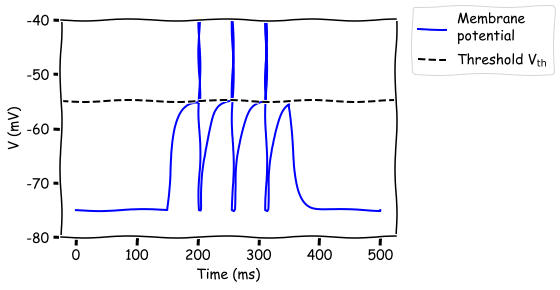

In [10]:
def run_LIF(pars, Iinj, stop=False):
  """
  Simulate the LIF dynamics with external input current

  Args:
    pars       : parameter dictionary
    Iinj       : input current [pA]. The injected current here can be a value
                 or an array
    stop       : boolean. If True, use a current pulse

  Returns:
    rec_v      : membrane potential
    rec_sp     : spike times
  """

  # Set parameters
  V_th, V_reset = pars['V_th'], pars['V_reset']
  tau_m, g_L = pars['tau_m'], pars['g_L']
  V_init, E_L = pars['V_init'], pars['E_L']
  dt, range_t = pars['dt'], pars['range_t']
  Lt = range_t.size
  tref = pars['tref']

  # Initialize voltage
  v = np.zeros(Lt)
  v[0] = V_init

  # Set current time course
  Iinj = Iinj * np.ones(Lt)

  # If current pulse, set beginning and end to 0
  if stop:
    Iinj[:int(len(Iinj) / 2) - 1000] = 0
    Iinj[int(len(Iinj) / 2) + 1000:] = 0

  # Loop over time
  rec_spikes = []  # record spike times
  tr = 0.  # the count for refractory duration

  for it in range(Lt - 1):

    if tr > 0:  # check if in refractory period
      v[it] = V_reset  # set voltage to reset
      tr = tr - 1 # reduce running counter of refractory period

    elif v[it] >= V_th:  # if voltage over threshold
      rec_spikes.append(it)  # record spike event
      v[it] = V_reset  # reset voltage
      tr = tref / dt  # set refractory time

    # Calculate the increment of the membrane potential
    dv = (-(v[it] - E_L) + Iinj[it] / g_L) * (dt / tau_m)

    # Update the membrane potential
    v[it + 1] = v[it] + dv

  # Get spike times in ms
  rec_spikes = np.array(rec_spikes) * dt

  return v, rec_spikes


# Get parameters
pars = default_pars(T=500)

# Simulate LIF model
v, sp = run_LIF(pars, Iinj=100, stop=True)

# Visualize
with plt.xkcd():
  plot_volt_trace(pars, v, sp)